In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline


In [134]:
df = pd.read_csv('E:\Rohan\Datasets\Digital Cognition Internship\Marketing Mix Modelling\Default.csv')

In [135]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [136]:
df = df.iloc[:,1:]

In [137]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [138]:
# Creating dummy variables for defaut & student
df_1=pd.get_dummies(df)
df_1

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.62507,1,0,1,0
1,817.180407,12106.13470,1,0,0,1
2,1073.549164,31767.13895,1,0,1,0
3,529.250605,35704.49394,1,0,1,0
4,785.655883,38463.49588,1,0,1,0
...,...,...,...,...,...,...
9995,711.555020,52992.37891,1,0,1,0
9996,757.962918,19660.72177,1,0,1,0
9997,845.411989,58636.15698,1,0,1,0
9998,1569.009053,36669.11236,1,0,1,0


In [139]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()
df["default2"] = labels.fit_transform(df["default"])
df["student2"] = labels.fit_transform(df["student"])

df.head()

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.62507,0,0
1,No,Yes,817.180407,12106.13470,0,1
2,No,No,1073.549164,31767.13895,0,0
3,No,No,529.250605,35704.49394,0,0
4,No,No,785.655883,38463.49588,0,0


In [140]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [141]:
len_no =len(df[df['default'] == 'No'])
len_yes =len(df[df['default'] == 'Yes'])
perc = (len_yes/(len_no + len_yes)) * 100
perc

3.3300000000000005

With only approx 3.33 percent of values being as Yes, for the next visualization we will reduce the number of No's to 15% and see how the comparison goes out.

In [142]:
#fig ,ax= plt.figure(figsize=(5,5))


# Take only a few of the samples where target value (default) is 'no', since default value as 'yes' is only 3 percent
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)
df_


,default,student,balance,income,default2,student2
2350,No,No,363.941463,46155.539220,0,0
8346,No,No,0.000000,47725.521530,0,0
9650,No,Yes,1004.630153,9643.366151,0,1
278,No,Yes,1096.820272,16148.060010,0,1
7576,No,Yes,1108.624099,18761.767100,0,1
...,...,...,...,...,...,...
9912,Yes,No,2148.898454,44309.917170,1,0
9921,Yes,Yes,1627.898323,17546.997020,1,1
9949,Yes,No,1750.253150,51578.940160,1,0
9951,Yes,No,1515.606239,48688.512090,1,0


Let us see the counts for the default column 

In [143]:
df_['default'].value_counts()

No     1450
Yes     333
Name: default, dtype: int64

Text(0.5, 1.0, 'Balance VS Income')

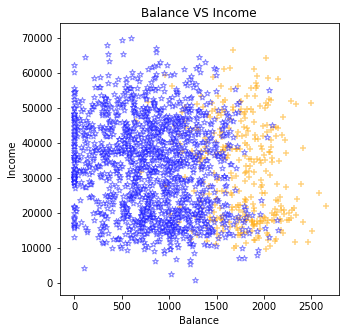

In [144]:
fig,ax= plt.subplots(figsize=(5,5))

ax.scatter(df_[df_.default=='Yes'].balance, df_[df_.default == 'Yes'].income, 
           color='orange', marker='+',alpha=0.5)

ax.scatter(df_[df_.default=='No'].balance, df_[df_.default == 'No'].income, 
           color='blue', facecolor='white',marker='*',alpha=0.5)

ax.set_ylabel('Income')
ax.set_xlabel('Balance')
ax.set_title('Balance VS Income')

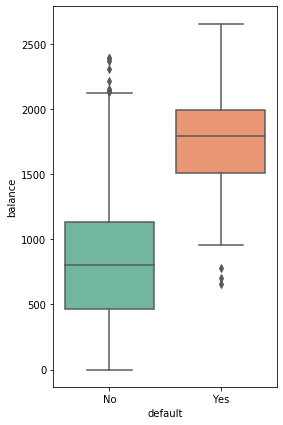

In [145]:
fig, ax =plt.subplots(figsize = (4,7))
sns.boxplot('default' ,'balance' , data=df , palette='Set2',ax=ax)

The default is observed to be 'Yes' when the balance is high. However we do observe certain outliers as well. 

The figure displays a very pronounced relationship
between the predictor balance and the response default. In most real
applications, the relationship between the predictor and the response will
not be nearly so strong. However, for the sake of illustrating the classification
procedures discussed in this chapter, we use an example in which the
relationship between the predictor and the response is somewhat exaggerated.

Let's look at a boxplot for default VS Income

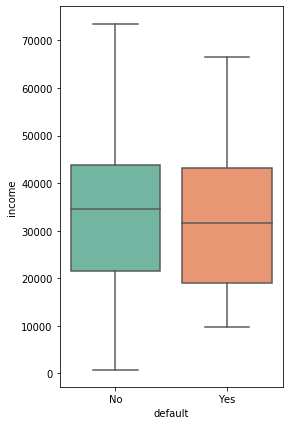

In [146]:
fig, ax =plt.subplots(figsize = (4,7))
sns.boxplot('default' ,'income' , data=df , palette='Set2',ax=ax)

# Logistic Regression 

In logistic regression, we use the logistic function,

p(X) =
e^(β0+β1X) /
1 + e^(β0+β1X)          -------------------------- 4.1

log (
p(X) /
1 − p(X)
)
= β0 + β1X. ---------------------------- 4.2

The left-hand side is called the log-odds or logit.

In a linear regression model, β1 gives the
average change in Y associated with a one-unit increase in X. In contrast,in a logistic regression model, increasing X by one unit changes the log odds
by β1 

### Estimating Regression Coefficients


In Linear Regression (Chapter 3), we used the least squares method. Here we use the maximum likelihood function for estimating whether the customer will default or not.

The maximum likelihood function estimates the B0 & B1 coefficients such that the p(X) of our equation (4.1) yields a number that is the closest to one for all customers who have defaulted (i.e ==1) or closest to zero for all customers who haven't defaulted (i.e == 0).

Let's look at a fit Logistic Regression model & how it carries out when estimating the probability of default=yes when using the predictor variable, balance.


### Using Sklearn

In [147]:
import sklearn.linear_model as skl_lm
# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
# I do not know the details on the differences between the solvers.
clf = skl_lm.LogisticRegression(solver='newton-cg')
y=df.default2
X_train = df.balance.values.reshape(-1,1)
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept : [-10.65133019]


### Using Statsmodels

In [148]:
y = df.default2

est = smf.logit('y ~ balance',df).fit()
est.summary2()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.453      
Dependent Variable: y                AIC:              1600.4517  
Date:               2020-06-10 19:56 BIC:              1614.8724  
No. Observations:   10000            Log-Likelihood:   -798.23    
Df Model:           1                LL-Null:          -1460.3    
Df Residuals:       9998             LLR p-value:      6.2329e-290
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept   -10.6513    0.3612  -29.4913  0.0000  -11.3592  -9.9435
balance       0.0055    0.0002   24.9524  0.0000    0.0051   0.0059
==================================================================

"""

We see that β1 =
0.0055; this indicates that an increase in balance is associated with an
increase in the probability of default. To be precise, a one-unit increase in
balance is associated with an increase in the log odds of default by 0.0055
units.

The estimated intercept in above table
is typically not of interest; its main purpose is to adjust the average fitted
probabilities to the proportion of ones in the data.

Let us use the predictor variable as student, which is a categorical variable. Yes== Students, No== Non-students

In [149]:
est_1 = smf.logit('y ~ student',df).fit()
est_1.summary2()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.004     
Dependent Variable: y                AIC:              2912.6831 
Date:               2020-06-10 19:56 BIC:              2927.1037 
No. Observations:   10000            Log-Likelihood:   -1454.3   
Df Model:           1                LL-Null:          -1460.3   
Df Residuals:       9998             LLR p-value:      0.00054161
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -3.5041   0.0707 -49.5541 0.0000 -3.6427 -3.3655
student[T.Yes]    0.4049   0.1150   3.5202 0.0004  0.1795  0.6303
=================================================================

"""

The Coefficient is significantly higher for Students who are stated as Yes. We observe the p-value to be really low hence we can say that it is statistically significant.
This gives us information that students tend to have a higher probability of defaulting than those who are non students.

## Multiple Logistic Regression

By predicting a binary response variable using multiple predictors.

log (
p(X) /
1 − p(X)
)
= β0 + β1X + β3 + .... + βn

In [150]:
est_2 = smf.logit('y ~ balance + income + student',df).fit()
est_2.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-10.8690,0.492,-22.079,0.000,-11.834,-9.904
student[T.Yes],-0.6468,0.236,-2.738,0.006,-1.110,-0.184
balance,0.0057,0.000,24.737,0.000,0.005,0.006
income,3.033e-06,8.2e-06,0.370,0.712,-1.3e-05,1.91e-05


Here, we can see that the p-values for the variables--> student & balance is quite low, hence each of these variables are associated with determining the probability of default.

However there is a discrepancy here. Notice that the coefficient for student is negative in the MLR and positive in the single logistic regression.

This is known as *confounding*

The negative coefficient for student in the multiple logistic regression indicates that for a fixed value of balance and income, a student is less likely to default than a non-student.


In [154]:

# balance and default vectors for students
X_train1 = df[df.student == 'Yes'].balance.values.reshape(df[df.student == 'Yes'].balance.size,1) 
y1 = df[df.student == 'Yes'].default2

# balance and default vectors for non-students
X_train2 = df[df.student == 'No'].balance.values.reshape(df[df.student == 'No'].balance.size,1) 
y2 = df[df.student == 'No'].default2

# Vector with balance values for plotting
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf1 = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf1.fit(X_train1,y1)
clf2.fit(X_train2,y2)

prob1 = clf1.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [152]:

df.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


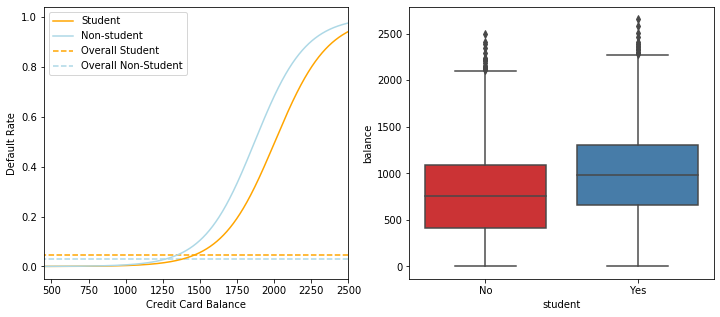

In [155]:

# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(X_test, pd.DataFrame(prob1)[1], color='orange', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2,  palette='Set1')

Here, on the left plot, we observe the default rates (the solid lines) for a non student is higher than a student as a for a given unit of balance. However, the horizontal dotted lines below show the default rates for students and non-students averaged over all values of balance and income. 

We can clearly see in fact it is the opposite of when compared to the function of only balance. 

From plot 2, we can observe that the variables , student & balance are correlated. As students tend to have higher debts, hence higher credit balance. 
This is generally observed.

# Linear Discriminant Analysis